In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#Loading the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
#Data Cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#Checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#Check descriptive statistics - for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
#TO check for all columns
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [41]:
#Converting Categorical columns into numerical columns - sex,smoker,region

df['sex'].unique()

array(['female', 'male'], dtype=object)

In [62]:
df['sex'] = df['sex'].apply(lambda x: x.lower().strip() if isinstance(x, str) else x) #It  checks if value x is string or not
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [48]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [50]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [66]:
df['smoker'] = df['smoker'].apply(lambda x: x.lower().strip() if isinstance(x, str) else x)
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [68]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [70]:
df['region'] = df['region'].apply(lambda x: x.lower().strip() if isinstance(x, str) else x)
df['region'] = df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Number of Persons based on sex:
sex
1    676
0    662
Name: count, dtype: int64


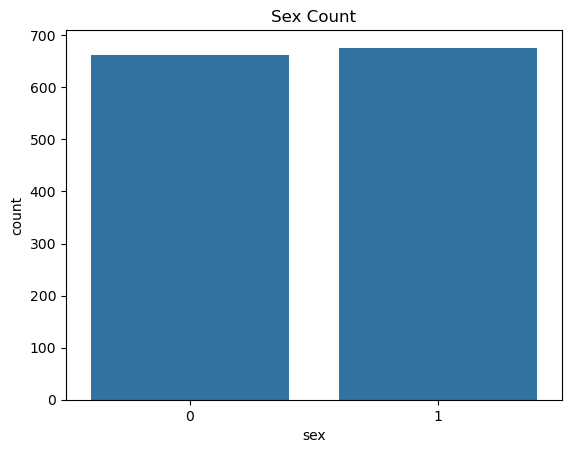

In [74]:
#EDA - Counting number of persons based on sex
print("Number of Persons based on sex:")
print(df['sex'].value_counts())
sns.countplot(x = 'sex' , data=df)
plt.title("Sex Count")
plt.show()

Number of Persons based on smoker:
smoker
0    1064
1     274
Name: count, dtype: int64


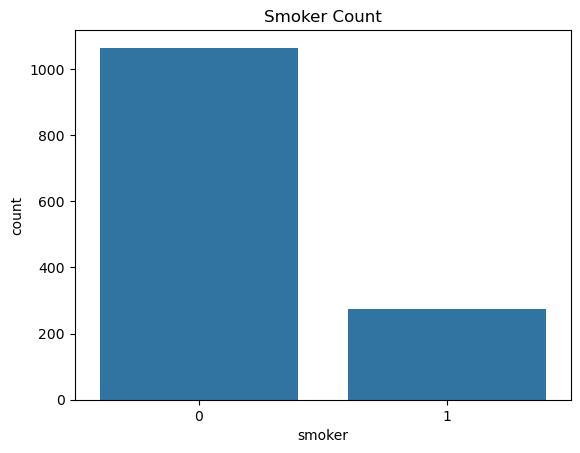

In [78]:
print("Number of Persons based on smoker:")
print(df['smoker'].value_counts())
sns.countplot(x = 'smoker' , data=df)
plt.title("Smoker Count")
plt.show()

Number of Persons based on region:
region
2    364
1    325
3    325
4    324
Name: count, dtype: int64


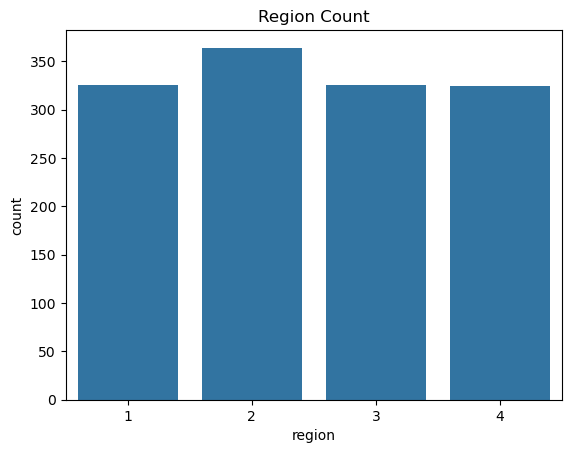

In [80]:
print("Number of Persons based on region:")
print(df['region'].value_counts())
sns.countplot(x = 'region' , data=df)
plt.title("Region Count")
plt.show()

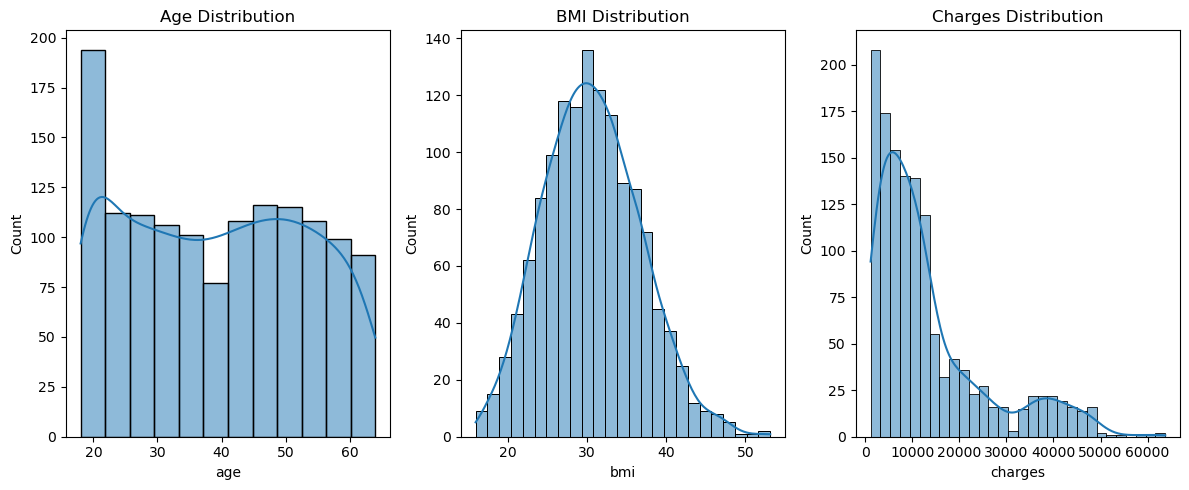

In [86]:
#Checking distributions
fig,axes = plt.subplots(1,3,figsize=(12,5))

#Age
sns.histplot(data=df['age'],kde=True,ax=axes[0])
axes[0].set_title("Age Distribution")

#BMI
sns.histplot(data=df['bmi'],kde=True,ax=axes[1])
axes[1].set_title("BMI Distribution")

#Charges
sns.histplot(data=df['charges'],kde=True,ax=axes[2])
axes[2].set_title("Charges Distribution")

plt.tight_layout()
plt.show()

<Axes: >

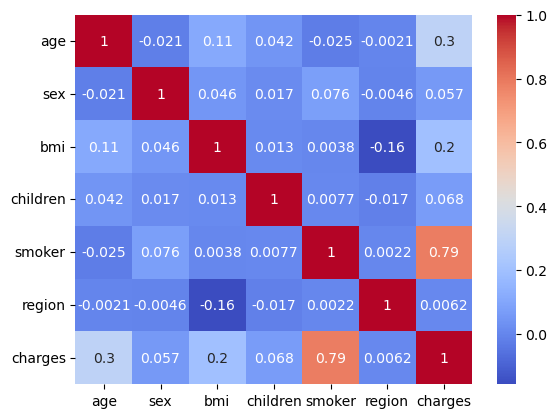

In [88]:
#Checking multi-colineraity using pearson correlation matrix
corr = df.corr()
sns.heatmap(corr,annot = True,cmap='coolwarm')

In [90]:
print(corr)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127 -0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.006208  1.000000


In [106]:
#Splitting Independent and dependent features 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [96]:
X = df.drop(['charges'],axis = 1)
y = df['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
print(X_train)

      age  sex     bmi  children  smoker  region
560    46    0  19.950         2       0       3
1285   47    0  24.320         0       0       4
1142   52    0  24.860         0       0       2
969    39    0  34.320         5       0       2
486    54    0  21.470         3       0       3
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       4
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       4
860    37    0  47.600         2       1       1
1126   55    1  29.900         0       0       1

[1070 rows x 6 columns]


In [100]:
print(y_train)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64


In [102]:
#Training the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [108]:
#Predict
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_lr)

print(f"Mean Squared Error of Linear Regression is:{mse:.2f}")
print(f"Root Mean Squared Error of Linear Regression is:{rmse:.2f}")
print(f"R2 Score of Linear Regression is : {r2:.2f}")

Mean Squared Error of Linear Regression is:33635210.43
Root Mean Squared Error of Linear Regression is:5799.59
R2 Score of Linear Regression is : 0.78


In [110]:
#Training with RandomFores Regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
#Predictions
y_pred_rf = rf.predict(X_test)
mse1 = mean_squared_error(y_test,y_pred_rf)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test,y_pred_rf)

print(f"Mean Squared Error of Random Forest Regressor is:{mse1:.2f}")
print(f"Root Mean Squared Error of Random Forest Regressor is:{rmse1:.2f}")
print(f"R2 Score of Random Forest Regressor is : {r2_1:.2f}")

Mean Squared Error of Random Forest Regressor is:20759356.24
Root Mean Squared Error of Random Forest Regressor is:4556.24
R2 Score of Random Forest Regressor is : 0.87


In [114]:
#Training with Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [116]:
#Predictions
y_pred_gb = gb.predict(X_test)
mse2 = mean_squared_error(y_test,y_pred_gb)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test,y_pred_gb)

print(f"Mean Squared Error of Gradient Boosting Regressor is:{mse2:.2f}")
print(f"Root Mean Squared Error of Gradient Boosting Regressor is:{rmse2:.2f}")
print(f"R2 Score of Gradient Boosting Regressor is : {r2_2:.2f}")

Mean Squared Error of Gradient Boosting Regressor is:18944595.16
Root Mean Squared Error of Gradient Boosting Regressor is:4352.54
R2 Score of Gradient Boosting Regressor is : 0.88


In [122]:
#Showing the predictions in the data frame

df1 = pd.DataFrame({'Actual':y_test,'LR':y_pred_lr,'RF':y_pred_rf,'GB':y_pred_gb})
df1.head(30)

,Actual,LR,RF,GB
764,9095.06825,8924.407244,11639.094925,11001.128629
887,5272.17580,7116.295018,5185.125385,5840.174656
890,29330.98315,36909.013521,28171.918576,28001.980112
1293,9301.89355,9507.874691,10229.050981,9745.291602
259,33750.29180,27013.350008,34551.909445,33639.100981
1312,4536.25900,10790.779562,9042.169544,5369.926526
899,2117.33885,226.298446,2154.652068,2686.290564
752,14210.53595,16942.715999,14205.415586,15046.074645
1286,3732.62510,1056.630794,5610.883242,4994.851313
707,10264.44210,11267.919973,11685.377414,10957.880429


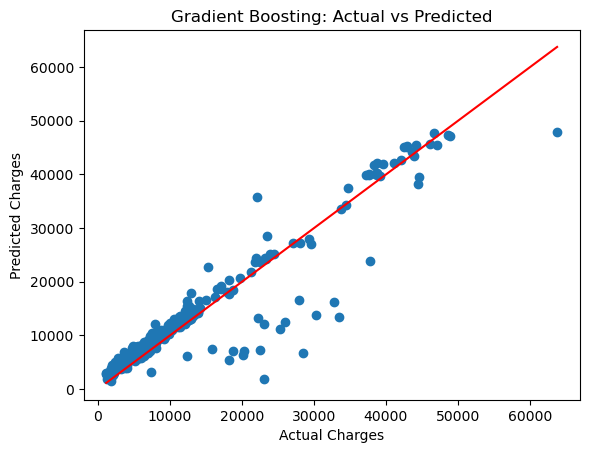

In [124]:
#Plotting Actual vs Predicted
plt.scatter(y_test,y_pred_gb)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red')
plt.show()

In [130]:
#Hyper Parameter tuning using GridSearchCV for Gradient Boosting

param_grid = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.05,0.1,0.2],
    'max_depth' : [3,4,5],
    'min_samples_split' : [2,3],
    'min_samples_leaf' : [1,3]
}

In [132]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator = gbr,
                           param_grid=param_grid,
                           cv = 5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [134]:
print("Best Parameters:",grid_search.best_params_)
best_gbr = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [136]:
#Predictions
y_pred_gb_best = best_gbr.predict(X_test)

mse_gb = mean_squared_error(y_test,y_pred_gb_best)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test,y_pred_gb_best)

print(f"Mean Squared Error of Gradient Boosting Regressor is:{mse_gb:.2f}")
print(f"Root Mean Squared Error of Gradient Boosting Regressor is:{rmse_gb:.2f}")
print(f"R2 Score of Gradient Boosting Regressor is : {r2_gb:.2f}")

Mean Squared Error of Gradient Boosting Regressor is:18524952.83
Root Mean Squared Error of Gradient Boosting Regressor is:4304.06
R2 Score of Gradient Boosting Regressor is : 0.88


In [140]:
#Showing the predictions in the data frame

df2 = pd.DataFrame({'Actual':y_test,'LR':y_pred_lr,'RF':y_pred_rf,'GB':y_pred_gb_best})
df1.head()

,Actual,LR,RF,GB
764,9095.06825,8924.407244,11639.094925,11001.128629
887,5272.17580,7116.295018,5185.125385,5840.174656
890,29330.98315,36909.013521,28171.918576,28001.980112
1293,9301.89355,9507.874691,10229.050981,9745.291602
259,33750.29180,27013.350008,34551.909445,33639.100981


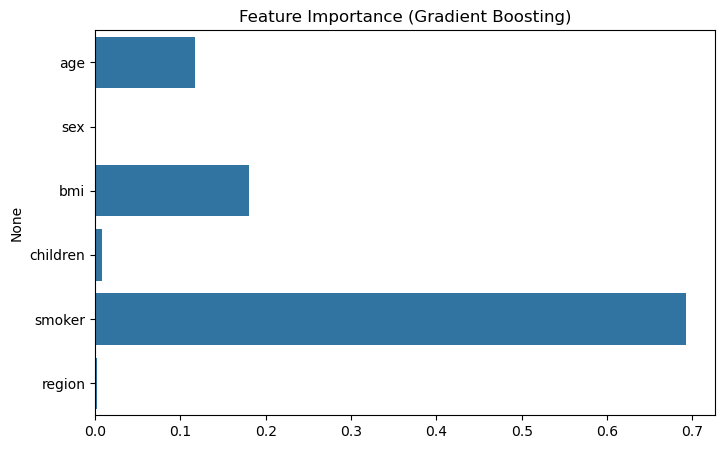

In [144]:
#Feature Importance

feature_importance = best_gbr.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance (Gradient Boosting)")
plt.show()

In [146]:
#Saving the model in pickle
import pickle

with open('Insurance_Cost_Prediction_GB_Model.pkl','wb') as f:
    pickle.dump(best_gbr,f)